# Proyecto final
## Reconocimiento de Patrones
## Expresión de proteínas en ratones

### Resumen

*En este proyecto se analiza el _dataset_ encontrado en el repositorio de [https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression](https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression) 
Este data _dataset_ fue elaborado por los autores del estudio [Ahmed MM _et al_ (2015)](https://www.ncbi.nlm.nih.gov/pubmed/25793384).
Esta investigación trató de asociar las dinámicas en la expresión de proteínas en ratones con síndrome de _Down_ bajo tratamiento de _memantina_. Se realizó en este proyecto un análisis de clasificación supervisada, para distinguir del dataset ocho diferentes subgrupos de la población de ratones.*


# Información relevante

## Dogma central

El **dogma central** describe el proceso del cómo la información codificada en del **ADN** llega a expresarse en estructuras bioquímicas con funcionalidades metabólicas. Este proceso inicia cuando transcriptores  copian secuencias del **ADN** a una secuencia **ARN**, de la cual los ribosomas internos de la célula utilizan de plano de construcción para sintetizar secuencias de **proteínas**. Las proteínas son el bloque de construcción más básico a nivel celular y su secuencia determina una estructura tridimensional física que establece su funcionalidad y categoría. 

Los análisis de expresión de proteína, son aquellos que de acuerdo a una muestra, extraen la cantidad de representación de una clase de proteína dentro de ella. Los análisis se reducen a una cierta cantidad de proteínas de interes. 

![dogma](https://www.yourgenome.org/sites/default/files/illustrations/diagram/dna_central_dogma_yourgenome.png)
>> Figura 1. Dogma central. Tomado de: [https://www.yourgenome.org/facts/what-is-the-central-dogm](https://www.yourgenome.org/facts/what-is-the-central-dogm)


## Síndrome de Down

El síndrome de Down se relaciona con un trastorno genético. El afectado mantiene 47 cromosomas en vez de 46 en sus genes. Esto es provocado por una replica del cromosoma 21,  enfermedad también denominada **trisomía 21**. Entre los efectos negativos, se encuentra un desarrollo pobre del cuerpo y del cerebro, causa de las dificultades en el aprendizaje. Hasta el momento no existen fármacos que ayuden curar la enfermedad. Algunos estudios demuestran que el estímulo por **memantina **  puede estimular el aprendizaje en los pacientes, pero no se ha encontrado una demostración molecular objetiva.

>> Fuente: [https://medlineplus.gov/spanish/ency/article/000997.htm](https://medlineplus.gov/spanish/ency/article/000997.htm)



## Memantina

La memantina es usada para disminuir síntomas de la enfermedad de Alzheimer. Funciona al reducir la actividad anormal en el cerebro. La memantina puede mejorar la capacidad para pensar y recordar o puede desacelerar la pérdida de las capacidades mentales. 

>> Fuente: [https://medlineplus.gov/spanish/druginfo/meds/a604006-es.html](https://medlineplus.gov/spanish/druginfo/meds/a604006-es.html)

# Descripción de la base de datos

La base de datos recompila **1080  muestras** de **72 ratones**,  por cada uno se extrageron información de 77 tipos de proteínas por medio de las señales detectables en el nucleo del cortéx cerebral. En la población de ratones, se distinguen dos tipos, 38 **control** (saludable) y 34 **trisómicos** (Síndrome de Down). En total se realizaron 15 mediciones durante periódos de tiempo.

De este estudio, se establecen 3 categorías principales:

1. **Genotipo:** control o trisómico

2. **Tratamiento:** estimulación por memantina o salina (placebo)

3. **Comportamiento:** estimulados para aprender o no hubo estimulación aprendizaje

## Categorías

**Clases:**

![](http://journals.plos.org/plosone/article/figure/image?size=large&id=info:doi/10.1371/journal.pone.0129126.g001)

Figura 2: tomada de [http://journals.plos.org/plosone/article/figure/image?size=large&id=info:doi/10.1371/journal.pone.0129126.g001](http://journals.plos.org/plosone/article/figure/image?size=large&id=info:doi/10.1371/journal.pone.0129126.g001)

# Preparación inicial del kernel
Aserción de actualización de bibliotecas de python 3.6 utilizadas dentro del kernel. 

**Nota**: Este kernel fue elaborado sobre  _**Google Colab**_

In [1]:
!pip3 install xlrd
!pip3 install pandas
!pip3 install scikit-learn
!pip3 install keras

# Descarga de la base de datos

Base de datos utilizada se encuentra en formato **Excel Office**. Se convierte en formato **Pandas DataFrame**.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


#Descarga del repositorio
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls"
#Lectura de archivo xls
df = pd.read_excel(url, sheet_name='Hoja1')



# Estudio de valores faltantes (_Missing values_)
Se visualiza la escacez de atributos para algunas mediciones. En este estudio, **no se descartan** sino se **rellenan con medias**.

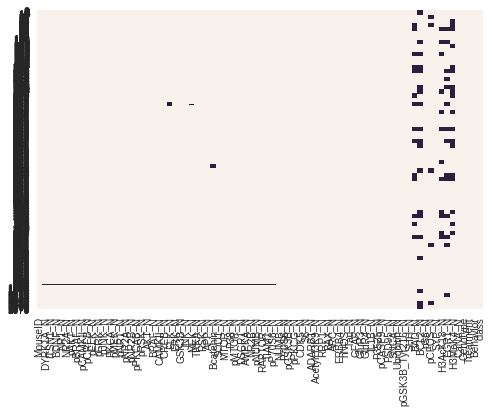

In [3]:
# Missing values
sns.heatmap(df.isnull(), cbar=False)

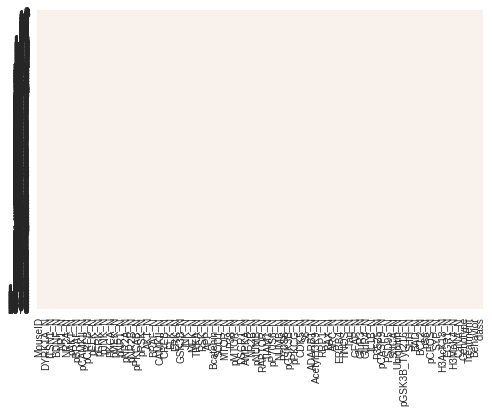

In [4]:
df.fillna(df.mean(), inplace=True)
# Missing values
sns.heatmap(df.isnull(), cbar=False)

# Recolección de etiquetas de la base de datos

Se recupera los objetivos de la base de datos para los 4 tipos de clasificación: **Genotipo**, **Tratamiento**, **Comportamiento** y **Clases**.

In [0]:
#Columnas
cols = df.columns
# variables
atributes = df.loc[:,cols[1:77]]
#Clasificacion individual
classes = df.loc[:,cols[-1]]
#Subgrupos
gentype = df.loc[:,cols[-4]]
treatment = df.loc[:,cols[-3]]
behavior = df.loc[:,cols[-2]]



# Codificación de etiquetas

La codificación se realiza por One-Hot encoding para facilitar la clasificación binaria o multi-class en los métodos de clasificación.

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
print(classes[:3])
print(classes[-3:])
#Codificación de categoría a numeración de las etiquetas
label_encoder_classes = LabelEncoder()
integer_encoded_classes = label_encoder_classes.fit_transform(classes)
integer_encoded_classes = integer_encoded_classes.reshape(len(integer_encoded_classes), 1)


# Codificación a one hot encoder 
onehot_encoder_classes = OneHotEncoder(sparse=False)
targets_classes = onehot_encoder_classes.fit_transform(integer_encoded_classes)
print(targets_classes)

print(len(targets_classes[0]))


0    c-CS-m
1    c-CS-m
2    c-CS-m
Name: class, dtype: object
1077    t-SC-s
1078    t-SC-s
1079    t-SC-s
Name: class, dtype: object
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
8


In [7]:
#Codificación de categoría a numeración de las etiquetas
print(gentype[:3])
print(gentype[-3:])
label_encoder_gentype = LabelEncoder()
integer_encoded_gentype = label_encoder_gentype.fit_transform(gentype)
integer_encoded_gentype = integer_encoded_gentype.reshape(len(integer_encoded_gentype), 1)


# Codificación a one hot encoder 
onehot_encoder_gentype = OneHotEncoder(sparse=False)
targets_gentype = onehot_encoder_gentype.fit_transform(integer_encoded_gentype)
targets_gentype



0    Control
1    Control
2    Control
Name: Genotype, dtype: object
1077    Ts65Dn
1078    Ts65Dn
1079    Ts65Dn
Name: Genotype, dtype: object


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [8]:
#Codificación de categoría a numeración de las etiquetas
print(treatment[:3])
print(treatment[-3:])
label_encoder_treatment = LabelEncoder()
integer_encoded_treatment = label_encoder_treatment.fit_transform(treatment)
integer_encoded_treatment = integer_encoded_treatment.reshape(len(integer_encoded_treatment), 1)


# Codificación a one hot encoder 
onehot_encoder_treatment = OneHotEncoder(sparse=False)
targets_treatment = onehot_encoder_treatment.fit_transform(integer_encoded_treatment)
targets_treatment

0    Memantine
1    Memantine
2    Memantine
Name: Treatment, dtype: object
1077    Saline
1078    Saline
1079    Saline
Name: Treatment, dtype: object


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [9]:
print(behavior[:3])
print(behavior[-3:])
#Codificación de categoría a numeración de las etiquetas
label_encoder_behavior = LabelEncoder()
integer_encoded_behavior = label_encoder_behavior.fit_transform(behavior)
integer_encoded_behavior = integer_encoded_behavior.reshape(len(integer_encoded_behavior), 1)


# Codificación a one hot encoder 
onehot_encoder_behavior = OneHotEncoder(sparse=False)
targets_behavior = onehot_encoder_classes.fit_transform(integer_encoded_behavior)
print(targets_behavior)

0    C/S
1    C/S
2    C/S
Name: Behavior, dtype: object
1077    S/C
1078    S/C
1079    S/C
Name: Behavior, dtype: object
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


# Estudio de reducción dimensional del problema

Como técnica utilizada para reducir las dimensiones del problema se utilizó el análisis de componentes principales (**PCA**), se muestra acontinuación
la adaptación por normalización de la media y varianza. Y luego el cálculo de las componentes principales.

Se realizó el estudio con **10** **componentes**.


Se grafica la proyección de los datos sobre las** 2 principales componentes**

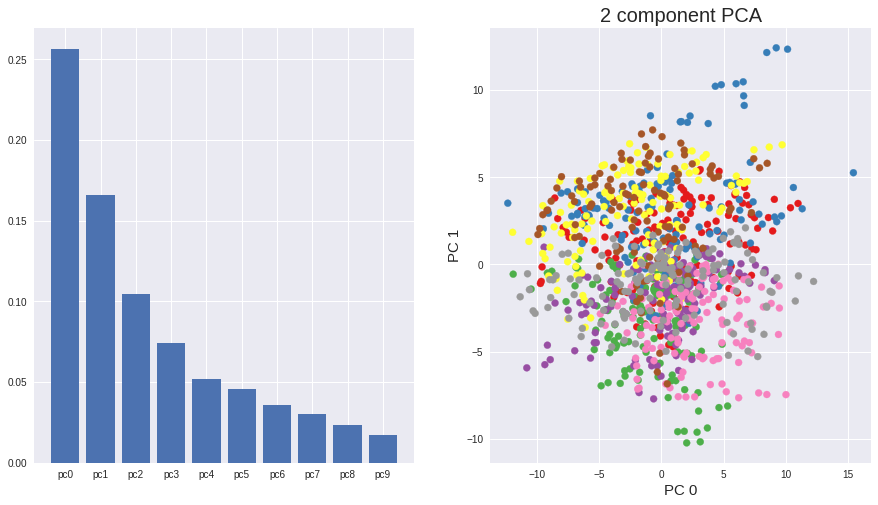

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

ss=StandardScaler()

x_s = ss.fit_transform(atributes)

n_components = 10
pca_features = ['pc'+str(i) for i in range(n_components)]

pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(x_s)


fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(1,2,1) 
ind = range(1,n_components+1)
ax.bar(ind,pca.explained_variance_ratio_,align='center')
#ax.plot(ind,pca.explained_variance_ratio_);
ax.set_xticks(ind)
ax.set_xticklabels(pca_features)


colors_classes=[np.argmax(r) for r in targets_classes]

ax2 = fig.add_subplot(1,2,2) 
ax2.set_xlabel('PC 0', fontsize = 15)
ax2.set_ylabel('PC 1', fontsize = 15)
ax2.set_title('2 component PCA', fontsize = 20)
ax2.scatter(principalComponents[:,0], principalComponents[:,1], c=colors_classes,cmap='Set1')


plt.show()




# Visualización de los datos y sus clases

Como primer acercamiento se visualiza que tanto **se observan patrones de conglomeraciones** de acuerdo a sus clasificaciones. Como primer acercamiento intuitivo, la clasificación **no es  marcada** para las clases de **genotipo y tratamiento**, pero para el **comportamiento** se logra apreciar mayor diferencia en las clases.

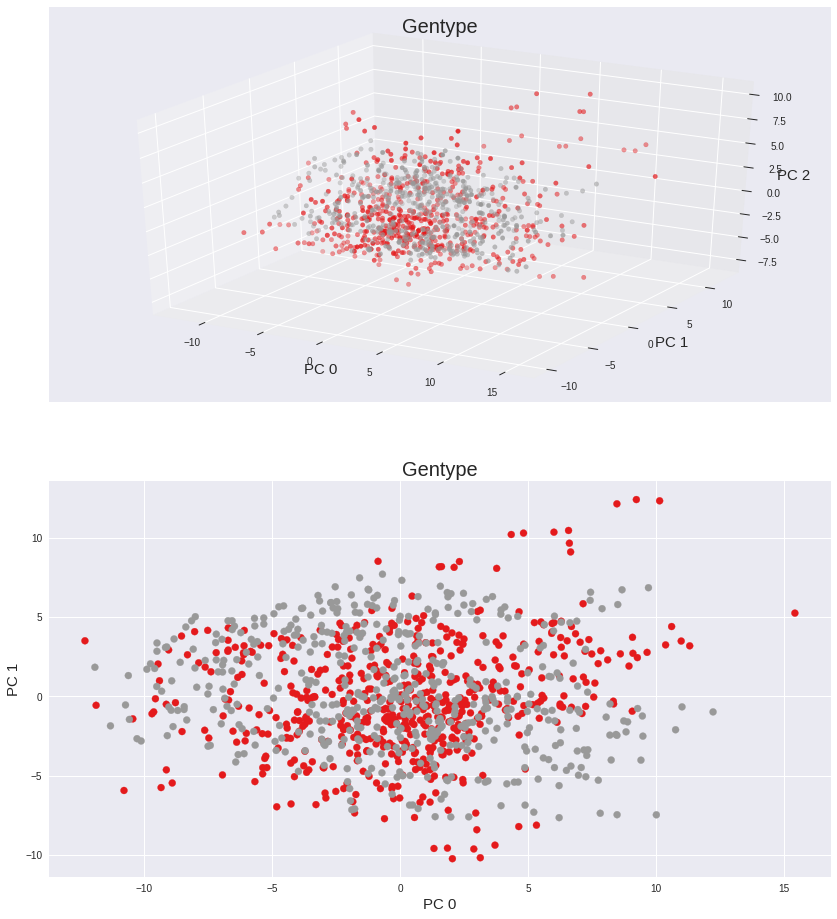

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (14,16))
colors_gentype = [np.argmax(r) for r in targets_gentype]
ax = fig.add_subplot(211,projection='3d') 
ind = range(1,n_components+1)
ax.scatter(principalComponents[:,0], principalComponents[:,1],principalComponents[:,2], c=colors_gentype,cmap='Set1')
ax.set_xlabel('PC 0', fontsize = 15)
ax.set_ylabel('PC 1', fontsize = 15)
ax.set_zlabel('PC 2', fontsize = 15)
ax.set_title('Gentype', fontsize = 20)

ax2 = fig.add_subplot(212) 
ax2.scatter(principalComponents[:,0], principalComponents[:,1], c=colors_gentype,cmap='Set1')
ax2.set_xlabel('PC 0', fontsize = 15)
ax2.set_ylabel('PC 1', fontsize = 15)
ax2.set_title('Gentype', fontsize = 20)
plt.show()


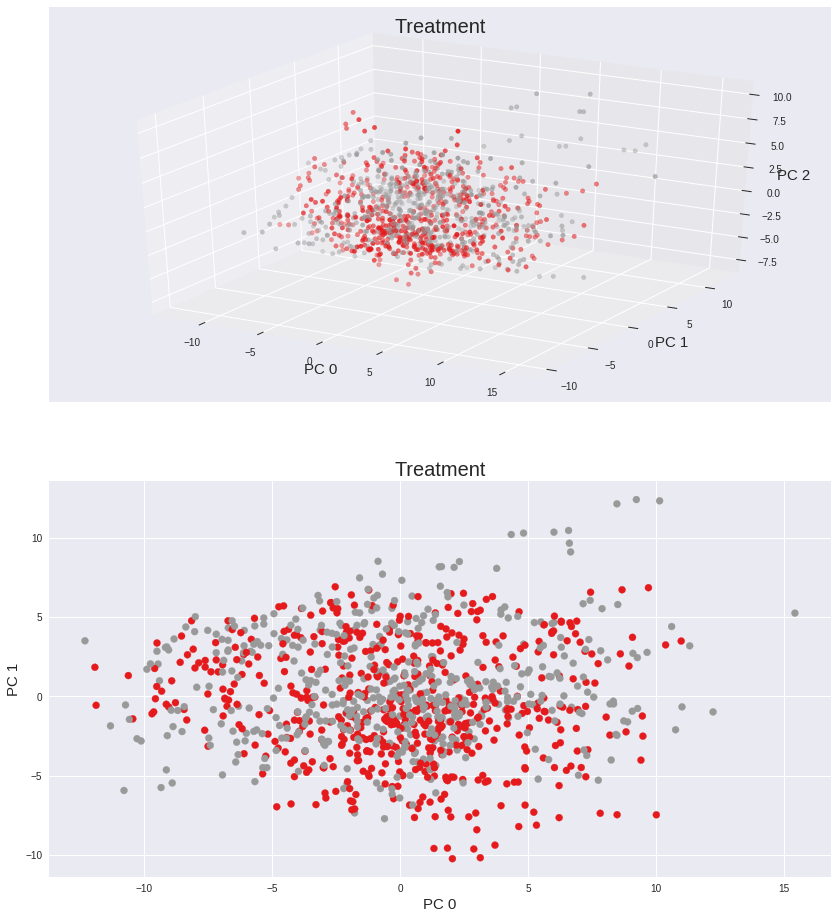

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (14,16))
colors_treatment = [np.argmax(r) for r in targets_treatment]
ax = fig.add_subplot(211,projection='3d') 
ind = range(1,n_components+1)
ax.scatter(principalComponents[:,0], principalComponents[:,1],principalComponents[:,2], c=colors_treatment,cmap='Set1')
ax.set_xlabel('PC 0', fontsize = 15)
ax.set_ylabel('PC 1', fontsize = 15)
ax.set_zlabel('PC 2', fontsize = 15)
ax.set_title('Treatment', fontsize = 20)

ax2 = fig.add_subplot(212) 
ax2.scatter(principalComponents[:,0], principalComponents[:,1], c=colors_treatment,cmap='Set1')
ax2.set_xlabel('PC 0', fontsize = 15)
ax2.set_ylabel('PC 1', fontsize = 15)
ax2.set_title('Treatment', fontsize = 20)
plt.show()


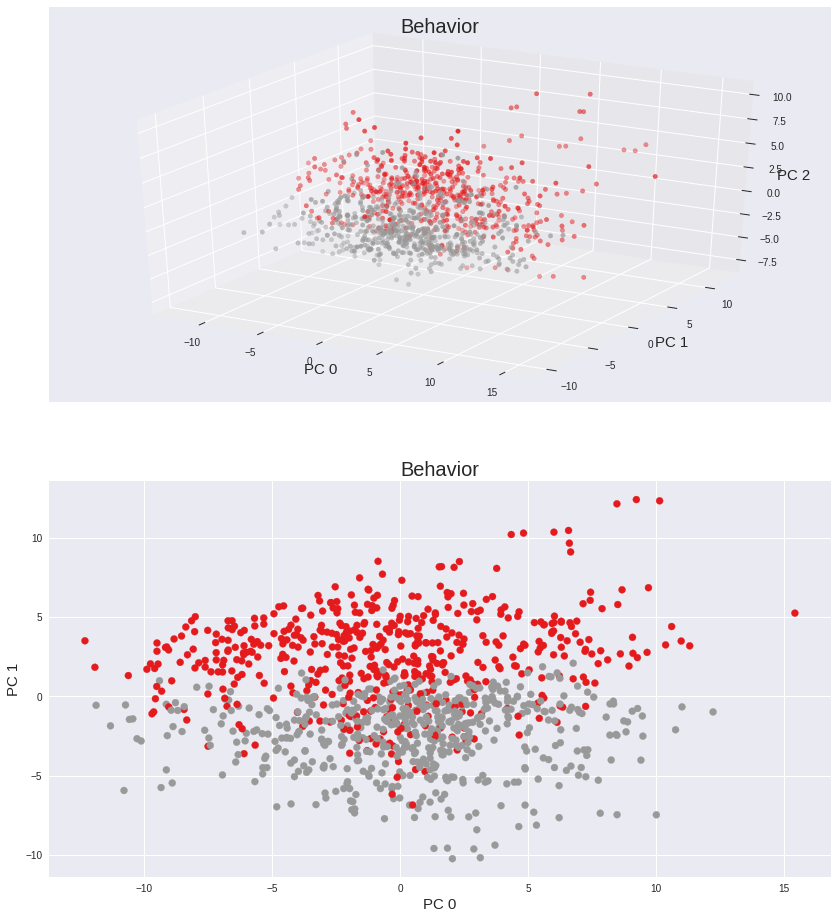

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (14,16))
colors_behavior = [np.argmax(r) for r in targets_behavior]
ax = fig.add_subplot(211,projection='3d') 
ind = range(1,n_components+1)
ax.scatter(principalComponents[:,0], principalComponents[:,1],principalComponents[:,2], c=colors_behavior,cmap='Set1')
ax.set_xlabel('PC 0', fontsize = 15)
ax.set_ylabel('PC 1', fontsize = 15)
ax.set_zlabel('PC 2', fontsize = 15)
ax.set_title('Behavior', fontsize = 20)


ax2 = fig.add_subplot(212) 
ax2.scatter(principalComponents[:,0], principalComponents[:,1], c=colors_behavior,cmap='Set1')
ax2.set_xlabel('PC 0', fontsize = 15)
ax2.set_ylabel('PC 1', fontsize = 15)
ax2.set_title('Behavior', fontsize = 20)
plt.show()

# Reorganización de la base de datos (Shuffle)

Las clases en la base de datos se encuentra organizada por clase, **se desordena aleatoriamente**. Asimismo se hacen dos grupos, el primero para **entrenar los modelos** y el **segundo para validarlos**.

In [0]:
from random import shuffle
ind_list = np.array(range(len(principalComponents)))
shuffle(ind_list)
principalComponents  = principalComponents[ind_list]
targets_classes = targets_classes[ind_list]
targets_gentype = targets_gentype[ind_list]
targets_treatment = targets_treatment[ind_list]
targets_behavior = targets_behavior[ind_list]



In [15]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(principalComponents,targets_classes, test_size = 0.20, random_state = 0)


/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Entrenamiento de modelos clasificadores

Modelos seleccionados:

1. **KNN**

2. **Decision Trees**

3. **LinearSVC**

4. **Gaussian Naive Bayes**

5. **Multi-Layer Neural Network**

6. **Keras Neural Network**


In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier


def plot_learning_curve(ax,estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

#    plt.figure()
    ax.set_title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax.grid()

    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    ax.legend(loc="best")
    #return ax

In [0]:
# Aquí se define la función de cálculo del ROC

from scipy import interp
from sklearn.metrics import roc_curve
from sklearn.cross_validation import KFold

def roc_plot(estimator, X, y,ylim=None):

    kf = KFold(n=len(y), n_folds=10)

    tprs = []
    base_fpr = np.linspace(0, 1, 101)

    plt.figure(figsize=(8, 8))
    if ylim is not None:
        plt.ylim(*ylim)
    colors = ['b','g','r','c','m']
    for label in range(5):
        tprs = []
        for i, (train, test) in enumerate(kf):
            model = estimator.fit(X[train], y[train])
            y_score = model.predict_proba(X[test])
            fpr, tpr, _ = roc_curve(y[test][:,label], y_score[label][:,1])
            tpr = interp(base_fpr, fpr, tpr)
            tpr[0] = 0.0
            tprs.append(tpr)

        tprs = np.array(tprs)
        mean_tprs = tprs.mean(axis=0)
        std = tprs.std(axis=0)

        tprs_upper = np.minimum(mean_tprs + std, 1)
        tprs_lower = mean_tprs - std


        plt.plot(base_fpr, mean_tprs, colors[label], label='ROC curve of class {0}'
                 ''.format(label))
        plt.fill_between(base_fpr, tprs_lower, tprs_upper, color=colors[label], alpha=0.05)

    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.axes().set_aspect('equal', 'datalim')
    plt.legend(loc="lower right")
    return plt

# Selección de dimensiones adecuadas para la clasificación
A continuación se realizó con ayuda del clasificador **KNN**, experimentación con la cantidad de dimensiones utilizadas para los modelos. Se muestra que con **10 componentes principales**,  se aprecia que el modelo clasificador es capaz distinguir los entre los **8 grupos con buena precisión**. 

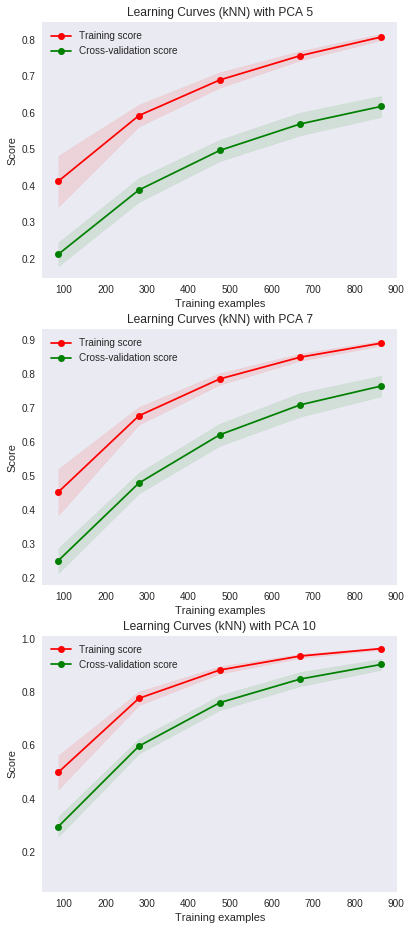

In [18]:


cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
fig = plt.figure(figsize = (14,16))
ax = fig.add_subplot(321) 
ax2 = fig.add_subplot(323)
ax3 = fig.add_subplot(325)



#PCA 5
X=principalComponents[:,range(5)]
estimator_knn1 = KNeighborsClassifier(n_neighbors=5)
title = "Learning Curves (kNN) with PCA 5"
plot_learning_curve(ax, estimator_knn1, title, X, targets_classes, (0.05, 1.01), cv=cv, n_jobs=4)
#roc_plot(ax_roc,estimator1, X, targets_classes)

#PCA 7
X=principalComponents[:,range(7)]
estimator_knn2 = KNeighborsClassifier(n_neighbors=5)
title = "Learning Curves (kNN) with PCA 7"
plot_learning_curve(ax2, estimator_knn2, title, X, targets_classes, (0.05, 1.01), cv=cv, n_jobs=4)
#roc_plot(ax_roc2,estimator2, X, targets_classes)

#PCA 10
X=principalComponents[:,range(10)]
estimator_knn3 = KNeighborsClassifier(n_neighbors=5)
title = "Learning Curves (kNN) with PCA 10"
plot_learning_curve(ax3, estimator_knn1, title, X, targets_classes, (0.05, 1.01), cv=cv, n_jobs=4)
#roc_plot(ax_roc3,estimator3, X, targets_classes)

plt.show()

## Ahora en adelante se utilizará el conjunto apartado de entrenamiento para los modelos

In [19]:
print(X_train)
print(Y_train)

[[ 6.69725404  4.41734815  0.20252137 ...  0.80115196 -2.15455232
   0.10128893]
 [ 0.17896863  0.09705618 -2.55855126 ...  1.76502588 -0.58350827
  -2.10571634]
 [-2.0640956  -1.84263011 -2.57503754 ... -1.0510164   2.40172576
  -1.99926109]
 ...
 [-2.47024557  5.27865712  2.48613859 ...  1.08282981  0.10189708
   1.01951717]
 [ 0.99856922  3.39896875  0.18939796 ...  0.54832328 -1.38598958
  -1.41524147]
 [-9.5082243   3.37657811  0.07857014 ...  2.33965915  0.1690433
  -0.03285958]]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# KNN

En este método se ajustó el parámetro de vecinos a 5, porque este fue el que mejor resultados obtuvo. Este método es muy eficiente en distinguir cada grupo principal (**comportamiento, genotipo y tratamiento**). Mientras tanto por cada clase buscada, se llega tener precisión de 80% con 700 muestras.

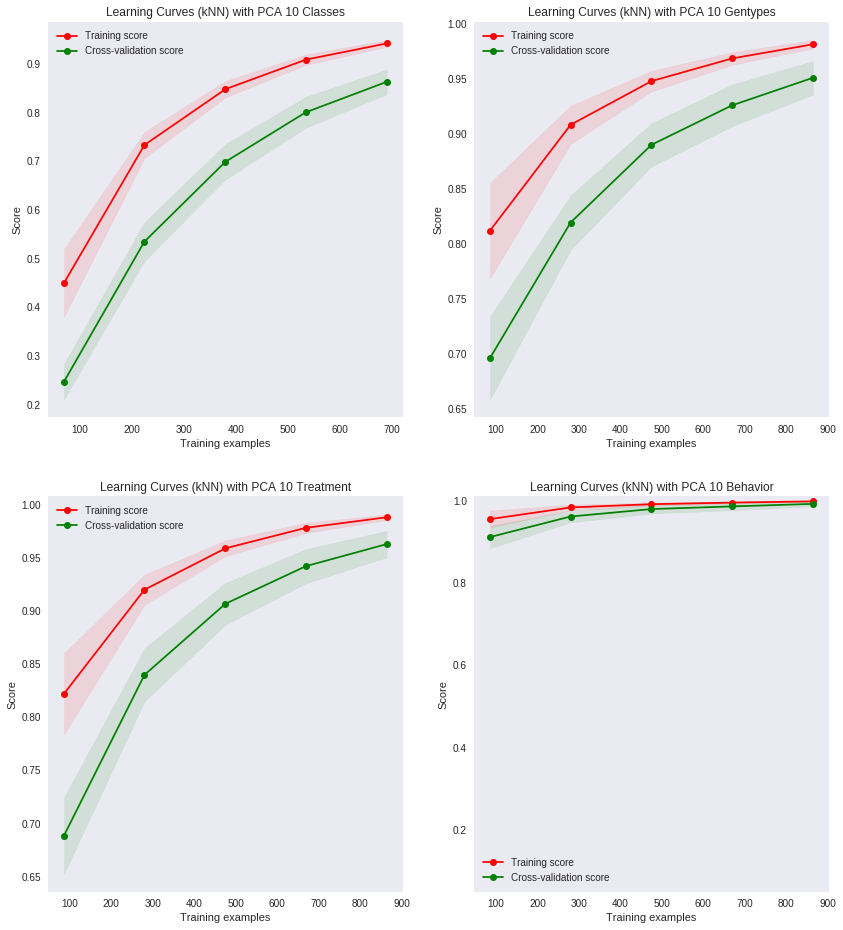

In [20]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
fig = plt.figure(figsize = (14,16))
ax = fig.add_subplot(221) 
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


estimator_knn = KNeighborsClassifier(n_neighbors=5)
title = "Learning Curves (kNN) with PCA 10 Classes"
plot_learning_curve(ax, estimator_knn, title, X_train, Y_train, (0.05, 1.01), cv=cv, n_jobs=4)
estimator_knn.fit(X_train, Y_train)
#PCA gentype
estimator_knn_gentype = KNeighborsClassifier(n_neighbors=5)
title = "Learning Curves (kNN) with PCA 10 Gentypes"
plot_learning_curve(ax2, estimator_knn_gentype, title, X, targets_gentype, (0.05, 1.01), cv=cv, n_jobs=4)
#PCA treatment
estimator_knn_treatment = KNeighborsClassifier(n_neighbors=5)
title = "Learning Curves (kNN) with PCA 10 Treatment"
plot_learning_curve(ax3, estimator_knn_treatment, title, X, targets_treatment, (0.05, 1.01), cv=cv, n_jobs=4)

#PCA behavior
estimator_knn_gentype = KNeighborsClassifier(n_neighbors=5)
title = "Learning Curves (kNN) with PCA 10 Behavior"
plot_learning_curve(ax4, estimator_knn_gentype, title, X, targets_behavior, (0.05, 1.01), cv=cv, n_jobs=4)



plt.show()

# Decision Trees

Este método se experimentó por su buena capacidad para distinguir los grupos principales fácilmente con 8 preguntas. Mientras tanto la clasificación por clases individuales llega a equivocarse más frecuentemente. 

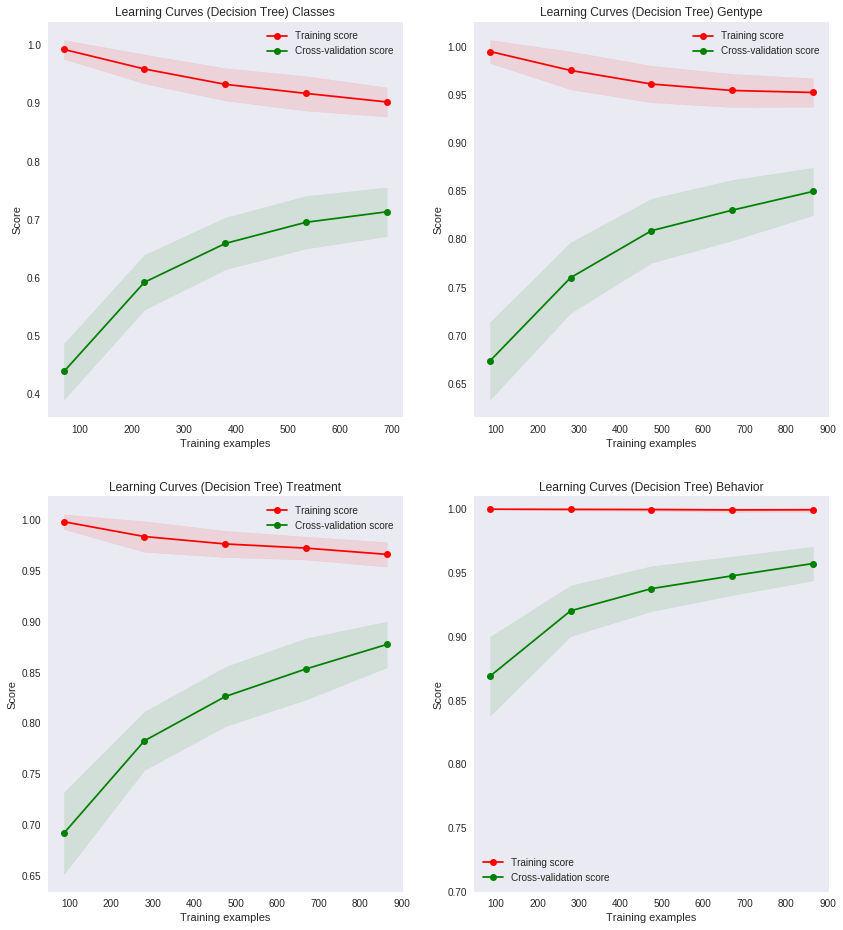

In [21]:
fig = plt.figure(figsize = (14,16))
ax = fig.add_subplot(221) 
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)


cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator_DT = DecisionTreeClassifier(max_depth=8)
estimator_DT_gentype = DecisionTreeClassifier(max_depth=8)
estimator_DT_treatment = DecisionTreeClassifier(max_depth=8)
estimator_DT_behavior = DecisionTreeClassifier(max_depth=8)
title = "Learning Curves (Decision Tree) Classes"
plot_learning_curve(ax,estimator_DT, title, X_train, Y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
estimator_DT.fit(X_train,Y_train)
title = "Learning Curves (Decision Tree) Gentype"
plot_learning_curve(ax1,estimator_DT_gentype, title, X, targets_gentype, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
title = "Learning Curves (Decision Tree) Treatment"
plot_learning_curve(ax2,estimator_DT_treatment, title, X, targets_treatment, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
title = "Learning Curves (Decision Tree) Behavior"
plot_learning_curve(ax3,estimator_DT_behavior, title, X, targets_behavior, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

# LinearSVC

De los métodos evaluados tradicionales, los resultados obtenidos sobresalen. Rápidamente logra clasificar con buena precisión. En los **grupos individuales se llega tener a precisión muy alta mientras** que los grupos de las **clases logra distinguirlos relativamente bien**.

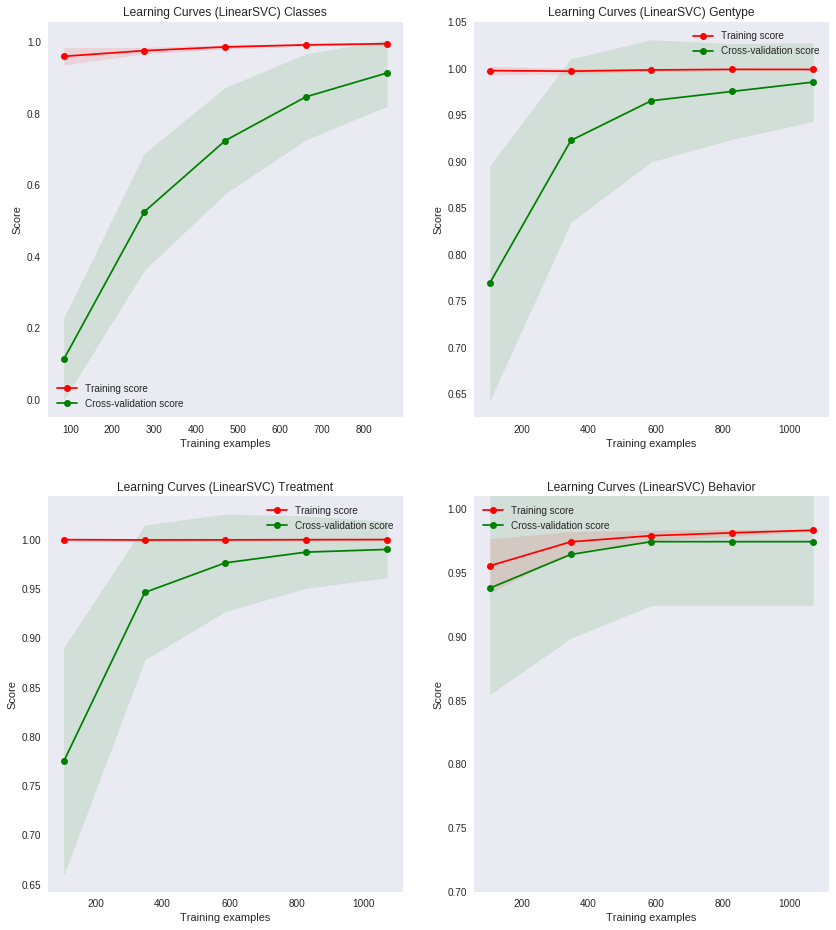

In [22]:
fig = plt.figure(figsize = (14,16))
ax = fig.add_subplot(221) 
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)


cv = ShuffleSplit(n_splits=100, test_size=0.01, random_state=0)
estimator_SVC = OneVsRestClassifier(SVC(kernel='rbf',gamma=0.1))
estimator_SVC_gentype = OneVsRestClassifier(SVC(kernel='rbf',gamma=0.1))
estimator_SVC_treatment = OneVsRestClassifier(SVC(kernel='rbf',gamma=0.1))
estimator_SVC_behavior = OneVsRestClassifier(SVC(kernel='rbf',gamma=0.001))
title = "Learning Curves (LinearSVC) Classes"
plot_learning_curve(ax,estimator_SVC, title, X_train, Y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=8)
estimator_SVC.fit(X_train,Y_train)
title = "Learning Curves (LinearSVC) Gentype"
plot_learning_curve(ax1,estimator_SVC_gentype, title, X, targets_gentype, ylim=(0.7, 1.01), cv=cv, n_jobs=8)
title = "Learning Curves (LinearSVC) Treatment"
plot_learning_curve(ax2,estimator_SVC_treatment, title, X, targets_treatment, ylim=(0.7, 1.01), cv=cv, n_jobs=8)
title = "Learning Curves (LinearSVC) Behavior"
plot_learning_curve(ax3,estimator_SVC_behavior, title, X, targets_behavior, ylim=(0.7, 1.01), cv=cv, n_jobs=8)
plt.show()

# Gaussian Naive Bayes

De los métodos evaluados, este fue el peor evaluado. La aservación del supuesto **Naive Bayes** en este problema parece afectar el modelo. Si se **evaluara con un método más minucioso (y complicado) de Bayes**, se podría mejorar los resultados.

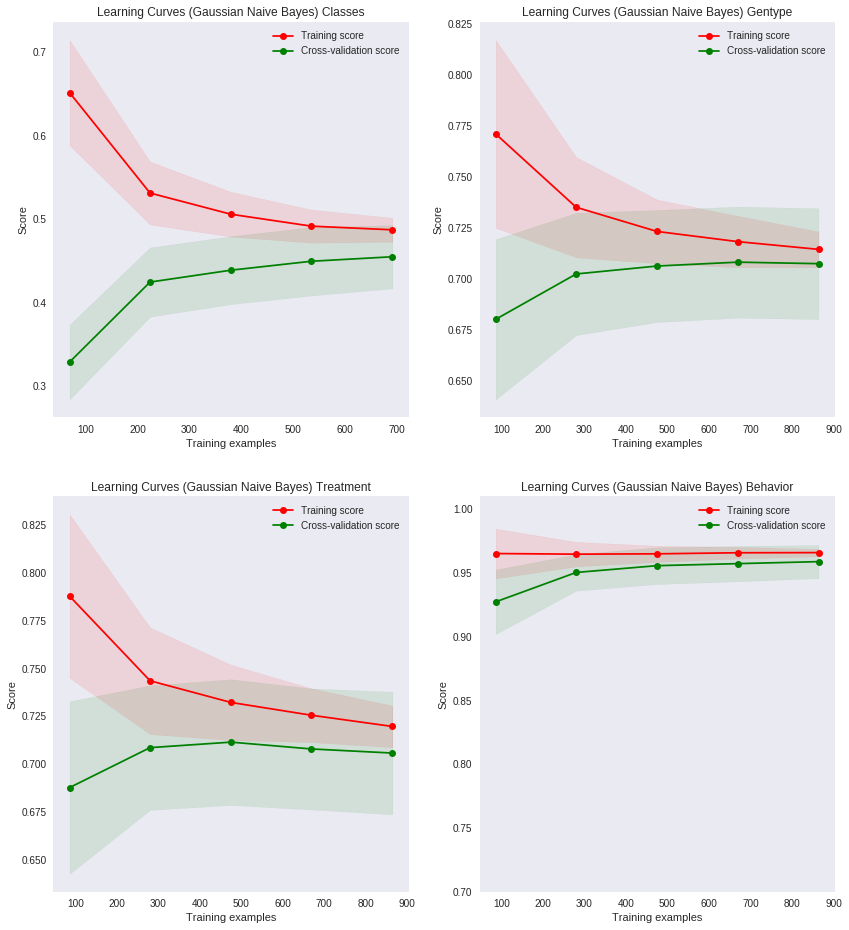

In [23]:
fig = plt.figure(figsize = (14,16))
ax = fig.add_subplot(221) 
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)


cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator_GNB = OneVsRestClassifier(GaussianNB())
estimator_GNB_gentype = OneVsRestClassifier(GaussianNB())
estimator_GNB_treatment = OneVsRestClassifier(GaussianNB())
estimator_GNB_behavior = OneVsRestClassifier(GaussianNB())
title = "Learning Curves (Gaussian Naive Bayes) Classes"
plot_learning_curve(ax,estimator_GNB, title, X_train, Y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=8)
estimator_GNB.fit(X_train,Y_train)
title = "Learning Curves (Gaussian Naive Bayes) Gentype"
plot_learning_curve(ax1,estimator_GNB_gentype, title, X, targets_gentype, ylim=(0.7, 1.01), cv=cv, n_jobs=8)
title = "Learning Curves (Gaussian Naive Bayes) Treatment"
plot_learning_curve(ax2,estimator_GNB_treatment, title, X, targets_treatment, ylim=(0.7, 1.01), cv=cv, n_jobs=8)
title = "Learning Curves (Gaussian Naive Bayes) Behavior"
plot_learning_curve(ax3,estimator_GNB_behavior, title, X, targets_behavior, ylim=(0.7, 1.01), cv=cv, n_jobs=8)
plt.show()

# Multi-layer Neural Network

En esta instancia se evaluó una red neuronal utilizando la biblioteca de **scikit-learn**. Para escoger la topología de la red neuronal **se valoró el tamaño de dimensiones de la entrada (10 dimensiones)** y **la cantidad en la salida (8 clases)**.  En caso de los clasificadores por grupos individuales, se trabajó con redes neuronales más superficiales. 


## Para clasificador de clases
**Capa oculta 1:** 9 neuronas

**Capa oculta 2:** 8 neuronas

$\alpha=9\times 10^{-5}$

## Clasificadores de grupos principales

**Capa oculta 1:** 8 neuronas

**Capa oculta 2:** 2 neuronas

$\alpha=2\times 10^{-5}$

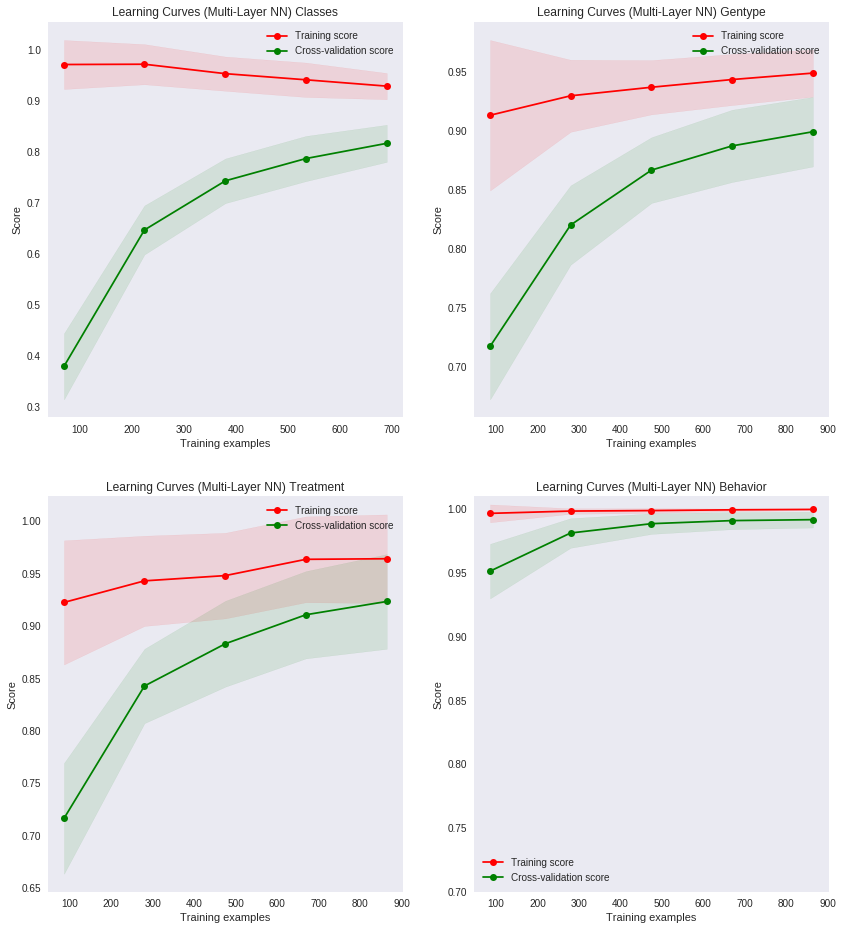

In [24]:
from sklearn.neural_network import MLPClassifier
fig = plt.figure(figsize = (14,16))
ax = fig.add_subplot(221) 
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)


cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator_MLP = MLPClassifier(solver='lbfgs', alpha=9e-5, hidden_layer_sizes=(9,8), random_state=1)
estimator_MLP_gentype = MLPClassifier(solver='lbfgs', alpha=2e-5, hidden_layer_sizes=(8,2), random_state=1)
estimator_MLP_treatment = MLPClassifier(solver='lbfgs', alpha=2e-5, hidden_layer_sizes=(8,2), random_state=1)
estimator_MLP_behavior = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8,2), random_state=1)
title = "Learning Curves (Multi-Layer NN) Classes"
plot_learning_curve(ax,estimator_MLP, title, X_train, Y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=8)
estimator_MLP.fit(X_train,Y_train)
title = "Learning Curves (Multi-Layer NN) Gentype"
plot_learning_curve(ax1,estimator_MLP_gentype, title, X, targets_gentype, ylim=(0.7, 1.01), cv=cv, n_jobs=8)
title = "Learning Curves (Multi-Layer NN) Treatment"
plot_learning_curve(ax2,estimator_MLP_treatment, title, X, targets_treatment, ylim=(0.7, 1.01), cv=cv, n_jobs=8)
title = "Learning Curves (Multi-Layer NN) Behavior"
plot_learning_curve(ax3,estimator_MLP_behavior, title, X, targets_behavior, ylim=(0.7, 1.01), cv=cv, n_jobs=8)
plt.show()

# Red neuronal utilizando Keras 

Para esta red neuronal, se elaboró el modelo por medio de experimentación por capas y optimizador.

El modelo final se entrena con los siguientes parámetros

## Topología de capas
Capa 1: 15 neuronas, activación RELU
Capa 2: 12 neuronas, activación RELU
Capa 3: 10 neuronas, activación RELU
Capa 4: 8 neuronas, activación RELU

## Función de Loss

*`categorical_crossentropy`*

Utilizada para clasificación multiclase

## Optimizador

**Adam**

learning rate$=0.005$

$\beta_1=0.9$

$\beta_2=0.999$

$\epsilon=0$

decay$=0.0$


Using TensorFlow backend.


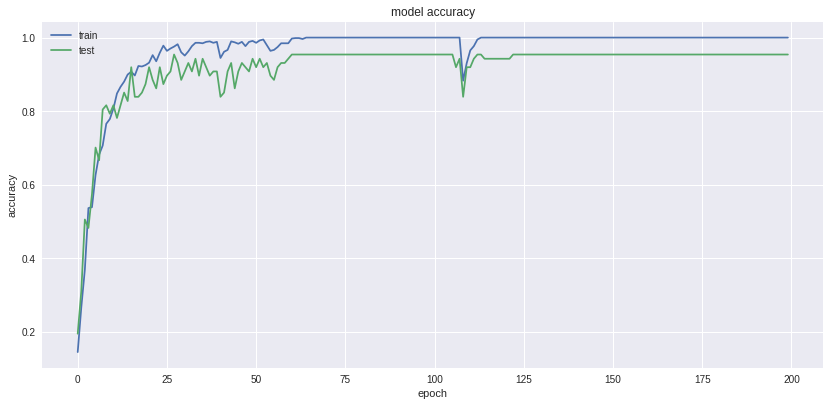

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils



fig = plt.figure(figsize = (14,14))
ax = fig.add_subplot(211) 

seed = 7
np.random.seed(seed)
def baseline_model():
  model = Sequential()
  model.add(Dense(15, input_dim=10, kernel_initializer='uniform', activation='relu'))
  model.add(Dense(12, kernel_initializer='uniform', activation='relu'))
  model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
  model.add(Dense(8, kernel_initializer='uniform', activation='softmax'))
  #compilar
  op=optimizers.Adam(lr=0.005)
  model.compile(loss='categorical_crossentropy', optimizer=op, metrics=['accuracy'])
  return model

  
estimator_keras = KerasClassifier(build_fn=baseline_model, validation_split=0.10, epochs=200, batch_size=10, verbose=0)

history = estimator_keras.fit(X_train,Y_train)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


#title = "Learning Curves (Keras Multi-Layer NN) Classes"
#plot_learning_curve(ax,estimator, title, X, targets_classes, ylim=(0.7, 1.01), cv=cv, n_jobs=8)
#plt.show()

## Comparación de modelos por Matrices de confusión

Como el interés de este proyecto es comprobar la posible clasificación por medio de los modelos examinados. Se utiliza ahora el grupo de datos **apartados desde el inicio** para obtener la matriz de confusión.

In [0]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# KNN

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[[26  0  0  0  0  0  0  0]
 [ 5 25  0  0  0  0  0  0]
 [ 0  0 29  2  0  0  0  0]
 [ 0  0  2 20  0  0  0  0]
 [ 0  0  0  0 25  0  0  0]
 [ 5  0  0  0  0 16  0  0]
 [ 1  0  2  2  0  0 20  0]
 [ 2  0  0  0  0  0  0 34]]
Confusion matrix, without normalization
[[26  0  0  0  0  0  0  0]
 [ 5 25  0  0  0  0  0  0]
 [ 0  0 29  2  0  0  0  0]
 [ 0  0  2 20  0  0  0  0]
 [ 0  0  0  0 25  0  0  0]
 [ 5  0  0  0  0 16  0  0]
 [ 1  0  2  2  0  0 20  0]
 [ 2  0  0  0  0  0  0 34]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.17 0.83 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.94 0.06 0.   0.   0.   0.  ]
 [0.   0.   0.09 0.91 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.24 0.   0.   0.   0.   0.76 0.   0.  ]
 [0.04 0.   0.08 0.08 0.   0.   0.8  0.  ]
 [0.06 0.   0.   0.   0.   0.   0.   0.94]]


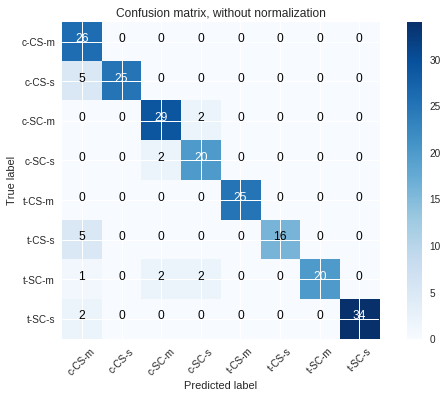

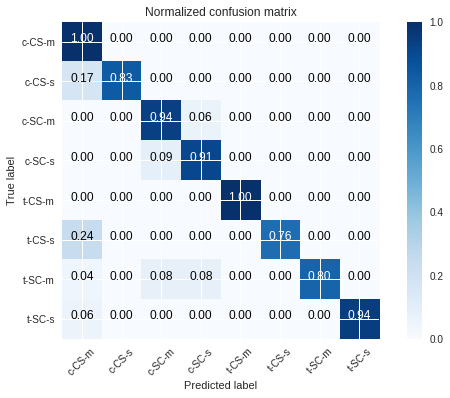

In [27]:
Y_test=label_encoder_classes.inverse_transform([np.argmax(i) for i in Y_test])


Y_pred=estimator_knn.predict(X_test)

Y_pred = label_encoder_classes.inverse_transform([np.argmax(i) for i in Y_pred])
# Compute confusion matrix

cnf_matrix = confusion_matrix(Y_test, Y_pred)
print(cnf_matrix)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=label_encoder_classes.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=label_encoder_classes.classes_, normalize=True,
                      title='Normalized confusion matrix')

# Decision Trees

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Confusion matrix, without normalization
[[23  2  0  0  1  0  0  0]
 [ 3 24  0  0  2  1  0  0]
 [ 7  0 18  0  0  1  3  2]
 [ 3  0  0 18  0  0  0  1]
 [ 4  1  2  0 17  1  0  0]
 [ 4  1  1  0  0 14  0  1]
 [ 3  0  2  0  0  0 19  1]
 [ 1  3  0  1  4  1  0 26]]
Normalized confusion matrix
[[0.88 0.08 0.   0.   0.04 0.   0.   0.  ]
 [0.1  0.8  0.   0.   0.07 0.03 0.   0.  ]
 [0.23 0.   0.58 0.   0.   0.03 0.1  0.06]
 [0.14 0.   0.   0.82 0.   0.   0.   0.05]
 [0.16 0.04 0.08 0.   0.68 0.04 0.   0.  ]
 [0.19 0.05 0.05 0.   0.   0.67 0.   0.05]
 [0.12 0.   0.08 0.   0.   0.   0.76 0.04]
 [0.03 0.08 0.   0.03 0.11 0.03 0.   0.72]]


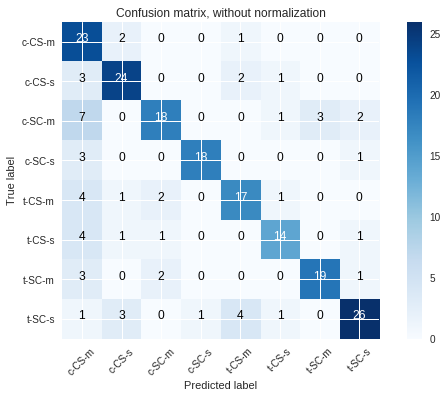

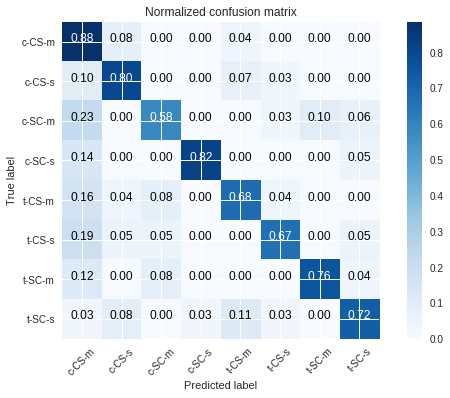

In [28]:
Y_pred=estimator_DT.predict(X_test)

Y_pred = label_encoder_classes.inverse_transform([np.argmax(i) for i in Y_pred])

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=label_encoder_classes.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=label_encoder_classes.classes_, normalize=True,
                      title='Normalized confusion matrix')

# Linear SVC

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Confusion matrix, without normalization
[[26  0  0  0  0  0  0  0]
 [ 3 27  0  0  0  0  0  0]
 [ 2  0 29  0  0  0  0  0]
 [ 0  0  0 22  0  0  0  0]
 [ 0  0  0  0 25  0  0  0]
 [ 7  0  0  0  0 14  0  0]
 [ 2  0  2  0  0  0 21  0]
 [ 7  0  0  0  0  0  0 29]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.1  0.9  0.   0.   0.   0.   0.   0.  ]
 [0.06 0.   0.94 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.33 0.   0.   0.   0.   0.67 0.   0.  ]
 [0.08 0.   0.08 0.   0.   0.   0.84 0.  ]
 [0.19 0.   0.   0.   0.   0.   0.   0.81]]


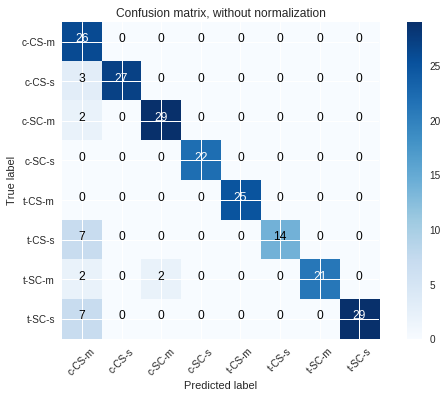

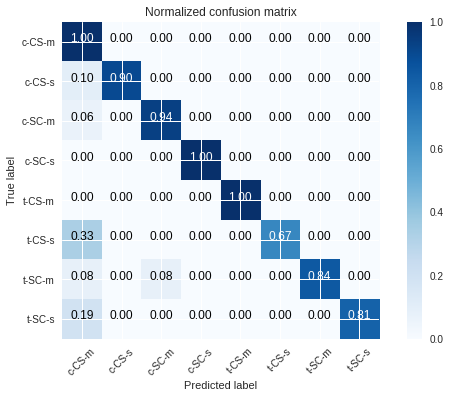

In [29]:
Y_pred=estimator_SVC.predict(X_test)

Y_pred = label_encoder_classes.inverse_transform([np.argmax(i) for i in Y_pred])

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=label_encoder_classes.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=label_encoder_classes.classes_, normalize=True,
                      title='Normalized confusion matrix')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Confusion matrix, without normalization
[[25  1  0  0  0  0  0  0]
 [20  9  0  0  1  0  0  0]
 [19  0 11  1  0  0  0  0]
 [ 4  0  0 17  0  0  0  1]
 [16  0  0  0  9  0  0  0]
 [12  1  0  0  1  7  0  0]
 [ 9  0 10  0  0  0  6  0]
 [12  0  0  3  0  1  0 20]]
Normalized confusion matrix
[[0.96 0.04 0.   0.   0.   0.   0.   0.  ]
 [0.67 0.3  0.   0.   0.03 0.   0.   0.  ]
 [0.61 0.   0.35 0.03 0.   0.   0.   0.  ]
 [0.18 0.   0.   0.77 0.   0.   0.   0.05]
 [0.64 0.   0.   0.   0.36 0.   0.   0.  ]
 [0.57 0.05 0.   0.   0.05 0.33 0.   0.  ]
 [0.36 0.   0.4  0.   0.   0.   0.24 0.  ]
 [0.33 0.   0.   0.08 0.   0.03 0.   0.56]]


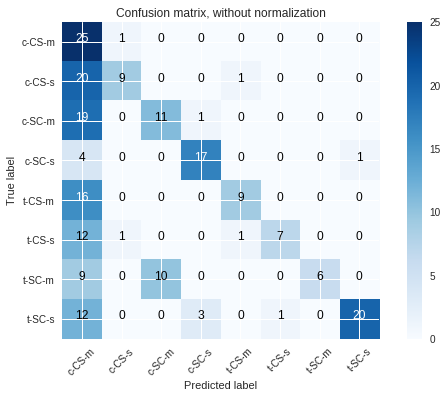

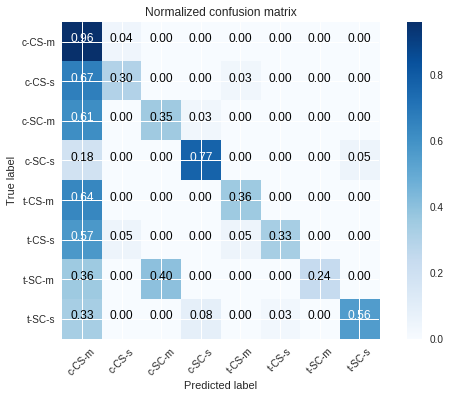

In [30]:
Y_pred=estimator_GNB.predict(X_test)

Y_pred = label_encoder_classes.inverse_transform([np.argmax(i) for i in Y_pred])

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=label_encoder_classes.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=label_encoder_classes.classes_, normalize=True,
                      title='Normalized confusion matrix')

# Scikit learn Multi Layer Neural Net

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Confusion matrix, without normalization
[[26  0  0  0  0  0  0  0]
 [ 2 28  0  0  0  0  0  0]
 [ 4  0 22  0  0  0  5  0]
 [ 0  0  0 22  0  0  0  0]
 [10  2  0  0 12  1  0  0]
 [ 5  1  0  0  1 14  0  0]
 [ 3  0  8  0  0  0 14  0]
 [ 0  0  0  0  0  0  0 36]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.07 0.93 0.   0.   0.   0.   0.   0.  ]
 [0.13 0.   0.71 0.   0.   0.   0.16 0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.4  0.08 0.   0.   0.48 0.04 0.   0.  ]
 [0.24 0.05 0.   0.   0.05 0.67 0.   0.  ]
 [0.12 0.   0.32 0.   0.   0.   0.56 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.  ]]


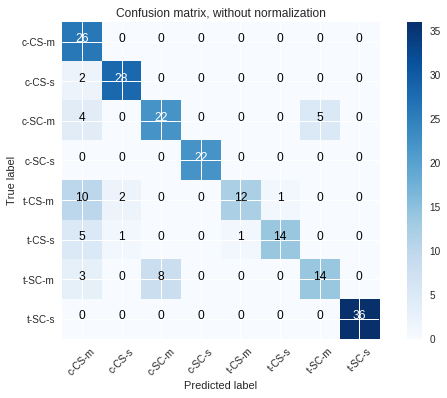

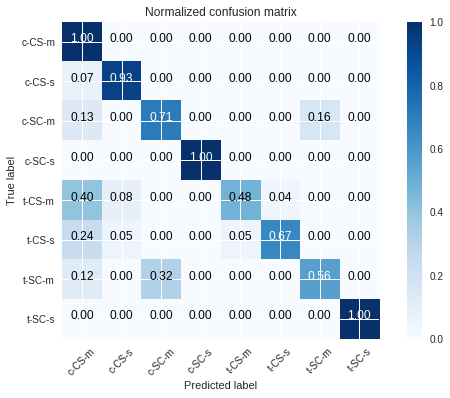

In [31]:
Y_pred=estimator_MLP.predict(X_test)

Y_pred = label_encoder_classes.inverse_transform([np.argmax(i) for i in Y_pred])

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=label_encoder_classes.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=label_encoder_classes.classes_, normalize=True,
                      title='Normalized confusion matrix')


# Keras Neural Network

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Confusion matrix, without normalization
[[26  0  0  0  0  0  0  0]
 [ 2 27  0  0  1  0  0  0]
 [ 0  0 29  0  0  0  2  0]
 [ 0  0  0 21  0  0  1  0]
 [ 0  1  0  0 24  0  0  0]
 [ 1  1  0  0  1 18  0  0]
 [ 0  0  1  1  0  0 23  0]
 [ 0  0  0  0  0  0  0 36]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.07 0.9  0.   0.   0.03 0.   0.   0.  ]
 [0.   0.   0.94 0.   0.   0.   0.06 0.  ]
 [0.   0.   0.   0.95 0.   0.   0.05 0.  ]
 [0.   0.04 0.   0.   0.96 0.   0.   0.  ]
 [0.05 0.05 0.   0.   0.05 0.86 0.   0.  ]
 [0.   0.   0.04 0.04 0.   0.   0.92 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.  ]]


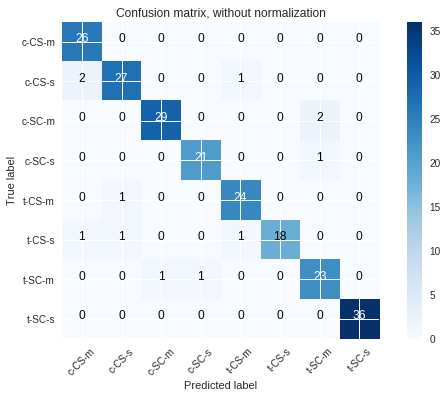

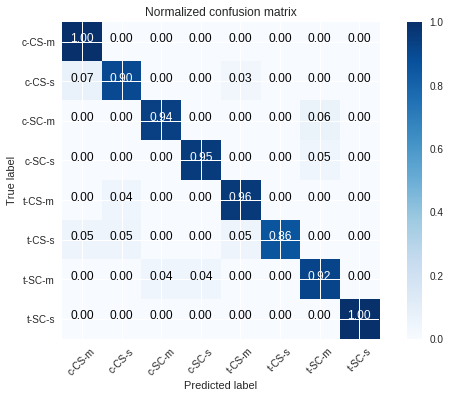

In [32]:
Y_pred=estimator_keras.predict_proba(X_test)

Y_pred = label_encoder_classes.inverse_transform([np.argmax(i) for i in Y_pred])

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=label_encoder_classes.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=label_encoder_classes.classes_, normalize=True,
                      title='Normalized confusion matrix')

# Conclusiones

1. Por lo general, los modelos suelen confundir con la clase **c-CS-m** (control, estimulado para aprender, con tratamiento). La mayoría de modelos se confunde por **t-CS-m** (con síndrome de Down). Puede que la combinación de factores similares, causen gran similitud (medicamento, estímulo a aprender), para que se confundan.

2. Gaussian Naive Bayes puede tener malos resultados; pero al observar su matriz de confusión, se observa como si logra atinar bien los dos casos extremos de  **c-CS-m** y  **t-SC-s** . Quiere decir que la expresión de proteínas no se puede comprender como un problema de atributos independientes uno del otro, sino que están entrelazados entre ellos. 

3. La red neuronal construida en Keras, logra superar la confusión entre las clases  **t-CS-m** y **c-CS-m**, así mismo el Linear SVC. Mientras tanto Linear SVC se equivoca más con **c-CS-m** por otras etiquetas. Aún así, la red neuronal es el modelo más balanceado en precisión y confusión.